<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n20.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.127961,65.304287,85.298878,0.000014,250.731140,250.731134,0.000006
1,0.0,1.0,75.099564,59.226925,66.924609,-0.000146,211.250951,211.251117,-0.000165
2,0.0,2.0,77.572841,70.494398,89.599707,0.000029,247.666975,247.666933,0.000042
3,0.0,3.0,89.302469,75.606915,70.850746,-0.000009,245.760121,245.760147,-0.000027
4,0.0,4.0,26.221471,65.445422,91.404974,-0.000044,193.071823,193.071805,0.000018
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,68.271902,36.557110,53.368208,0.000047,168.197267,168.197392,-0.000125
29996,999.0,26.0,91.838727,41.951685,57.843097,-0.000102,201.633407,201.633629,-0.000222
29997,999.0,27.0,98.797809,87.344123,71.955339,-0.000008,268.097263,268.097177,0.000086
29998,999.0,28.0,41.041488,59.485003,39.933158,0.000057,150.459706,150.459737,-0.000032


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.127961,65.304287,85.298878,0.000014,250.731140,250.731134,0.000006
1,0.0,1.0,75.099564,59.226925,66.924609,-0.000146,211.250951,211.251117,-0.000165
2,0.0,2.0,77.572841,70.494398,89.599707,0.000029,247.666975,247.666933,0.000042
3,0.0,3.0,89.302469,75.606915,70.850746,-0.000009,245.760121,245.760147,-0.000027
4,0.0,4.0,26.221471,65.445422,91.404974,-0.000044,193.071823,193.071805,0.000018
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,68.271902,36.557110,53.368208,0.000047,168.197267,168.197392,-0.000125
29996,999.0,26.0,91.838727,41.951685,57.843097,-0.000102,201.633407,201.633629,-0.000222
29997,999.0,27.0,98.797809,87.344123,71.955339,-0.000008,268.097263,268.097177,0.000086
29998,999.0,28.0,41.041488,59.485003,39.933158,0.000057,150.459706,150.459737,-0.000032


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.127961,65.304287,85.298878,0.000014,250.731140,250.731134,0.000006
1,0.0,1.0,75.099564,59.226925,66.924609,-0.000146,211.250951,211.251117,-0.000165
2,0.0,2.0,77.572841,70.494398,89.599707,0.000029,247.666975,247.666933,0.000042
3,0.0,3.0,89.302469,75.606915,70.850746,-0.000009,245.760121,245.760147,-0.000027
4,0.0,4.0,26.221471,65.445422,91.404974,-0.000044,193.071823,193.071805,0.000018
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,68.271902,36.557110,53.368208,0.000047,168.197267,168.197392,-0.000125
29996,999.0,26.0,91.838727,41.951685,57.843097,-0.000102,201.633407,201.633629,-0.000222
29997,999.0,27.0,98.797809,87.344123,71.955339,-0.000008,268.097263,268.097177,0.000086
29998,999.0,28.0,41.041488,59.485003,39.933158,0.000057,150.459706,150.459737,-0.000032


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    90.127961  65.304287  85.298878  ...  250.731140  250.731134  0.000006
      1.0    75.099564  59.226925  66.924609  ...  211.250951  211.251117 -0.000165
      2.0    77.572841  70.494398  89.599707  ...  247.666975  247.666933  0.000042
      3.0    89.302469  75.606915  70.850746  ...  245.760121  245.760147 -0.000027
      4.0    26.221471  65.445422  91.404974  ...  193.071823  193.071805  0.000018
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   68.271902  36.557110  53.368208  ...  168.197267  168.197392 -0.000125
      26.0   91.838727  41.951685  57.843097  ...  201.633407  201.633629 -0.000222
      27.0   98.797809  87.344123  71.955339  ...  268.097263  268.097177  0.000086
      28.0   41.041488  59.485003  39.933158  ...  150.459706  150.459737 -0.000032
      29.0   92.237168  75.364593  87.330660  ...  264.932447  264.932401  0.000045

[30000 rows x 7 columns]

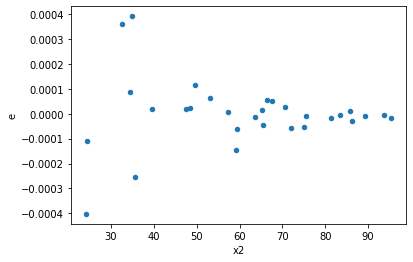

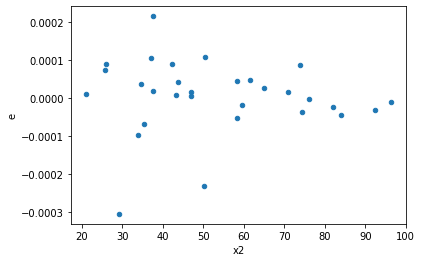

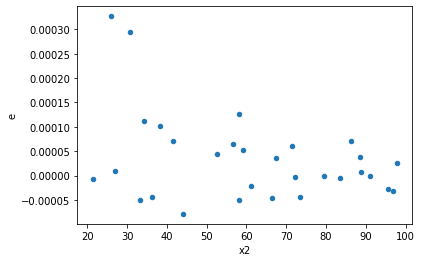

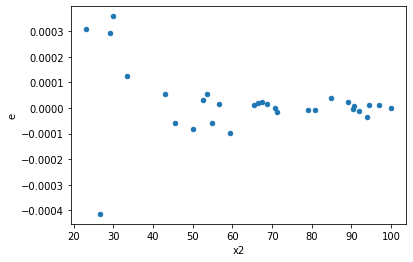

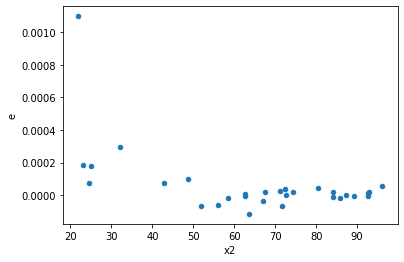

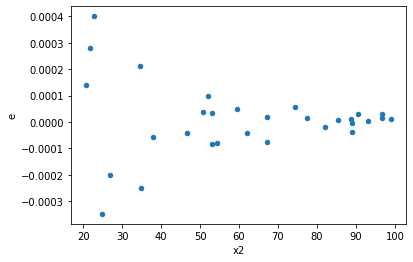

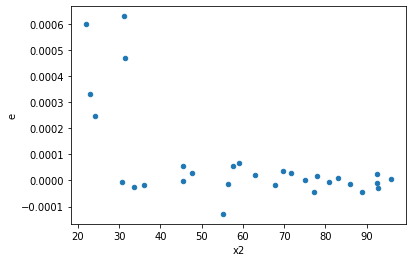

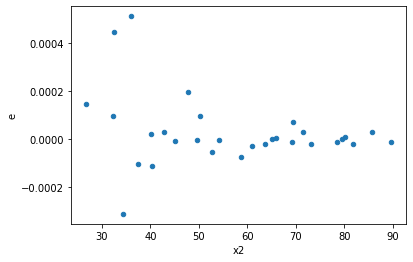

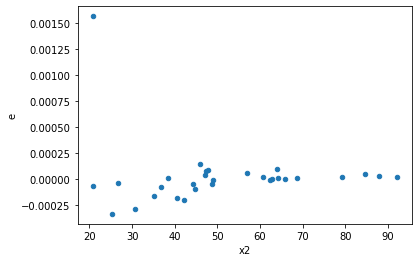

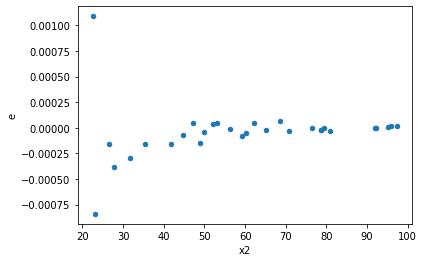

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,6.663603771957272e-09,4.46111697692394e-07,8.32950471494659e-10,5.576396221154925e-08,0.014937074742550252,7.225431194815409e-07,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,8.278221234050636e-09,1.3556912794460622e-07,1.0347776542563295e-09,1.6946140993075777e-08,0.06106273131323182,0.0002944803249356421,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,9.041988577163079e-09,1.629412631856729e-07,1.1302485721453849e-09,2.0367657898209114e-08,0.05549231913625009,0.00019899775456601302,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,4.1309888998391536e-09,3.051572842285762e-07,5.163736124798942e-10,3.8144660528572024e-08,0.013537244933484406,4.6877312988876314e-07,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,4.687833205634455e-09,6.682452159144538e-07,5.859791507043069e-10,8.353065198930673e-08,0.0070151391944040095,2.551904916554083e-08,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,5.9302903749703145e-09,4.5219431379955855e-07,7.412862968712893e-10,5.652428922494482e-08,0.013114473565890523,4.0765032656355256e-07,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,4.904468025726271e-09,1.766414701918621e-07,6.130585032157838e-10,2.2080183773982763e-08,0.027765099669965383,1.072340023119222e-05,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,7.143567352192867e-09,5.137347955024334e-07,8.929459190241084e-10,6.421684943780418e-08,0.013905165495372854,5.274848969406323e-07,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,9.533315304393598e-09,1.3757843289251255e-06,1.1916644130491997e-09,1.719730411156407e-07,0.006929367564349128,2.4159869133762587e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    994
Reject001=1 : Homoscedasticity        6
Name: Result_test, dtype: int64